<a href="https://colab.research.google.com/github/Anny8910/Detection-of-COVID-19-from-X-ray-images/blob/master/Dataset_Creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import os
import shutil

In [174]:
#Sampling of COVID-19 dataset

FILE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/covid-chestxray-dataset-master/covid-chestxray-dataset-master/metadata.csv"
IMAGE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images"

In [175]:
df=pd.read_csv(FILE_PATH)
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [176]:
df.shape

(930, 29)

In [177]:

TARGET_DIR="/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset/Covid"
if not os.path.exists(TARGET_DIR):
  os.mkdir(TARGET_DIR)
  print("COVID folder created")


In [178]:

count=0
for (i,row) in df.iterrows():
  if row["finding"]=="COVID-19" and row["view"]=="PA":
    filename=row['filename']
    image_path=os.path.join(IMAGE_PATH,filename)
    image_copy_path=os.path.join(TARGET_DIR,filename)
    shutil.copy2(image_path,image_copy_path)
    #print("Moving image",count)
    count+=1

In [179]:
#Sampling of Normal dataset(images) from Kaggle

import random
KAGGLE_FILE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR="/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset/Normal"



In [180]:
image_names=os.listdir(KAGGLE_FILE_PATH)

In [181]:
random.shuffle(image_names)

In [182]:
for i in range(180):
  image_name=image_names[i]
  image_path=os.path.join(KAGGLE_FILE_PATH,image_name)
  target_path=os.path.join(TARGET_NORMAL_DIR,image_name)
  shutil.copy2(image_path,target_path)
  #print("Copying image", i)

In [183]:
root_dir = '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset'
posCls = '/Covid'
negCls = '/Normal'

if os.path.exists(root_dir):
  os.makedirs(root_dir +'/train' + posCls)
  os.makedirs(root_dir +'/train' + negCls)
  os.makedirs(root_dir +'/val' + posCls)
  os.makedirs(root_dir +'/val' + negCls)


In [184]:
import numpy as np
currentCls = posCls
src = "/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset"+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
print(len(allFileNames))
train_FileNames, val_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.8)])

import numpy as np
currentCls1 = negCls
src1 = "/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset"+currentCls1 # Folder to copy images from

allFileNames1 = os.listdir(src1)
np.random.shuffle(allFileNames1)
print(len(allFileNames1))
train_FileNames1, val_FileNames1 = np.split(np.array(allFileNames1), [int(len(allFileNames1)*0.8)])



180
180


In [185]:
train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
#print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"+currentCls)


Total images:  180
Training:  144
Validation:  36


In [186]:
train_FileNames1 = [src1+'/'+ name for name in train_FileNames1.tolist()]
val_FileNames1 = [src1+'/' + name for name in val_FileNames1.tolist()]
#test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames1))
print('Training: ', len(train_FileNames1))
print('Validation: ', len(val_FileNames1))
#print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames1:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"+currentCls1)

for name in val_FileNames1:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"+currentCls1)

#for name in test_FileNames:
 #   shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/test"+currentCls)

Total images:  180
Training:  144
Validation:  36


In [187]:
TRAIN_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"
VAL_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"

In [188]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras_preprocessing import image

In [189]:
#CNN Based Model in Keras

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [190]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 54, 54, 64)       

In [191]:
#Train

train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [192]:
train_generator=train_datagen.flow_from_directory(
   '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train',
   target_size=(224,224),
   batch_size=32,
   class_mode='binary' 
)

Found 288 images belonging to 2 classes.


In [193]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [194]:
validation_generator=test_dataset.flow_from_directory(
   '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val',
   target_size=(224,224),
   batch_size=32,
   class_mode='binary' 
)

Found 72 images belonging to 2 classes.


In [195]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)


Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 0.8920 - accuracy: 0.5742 - val_loss: 0.6620 - val_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5298 - accuracy: 0.7617 - val_loss: 0.4180 - val_accuracy: 0.8906
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.3933 - accuracy: 0.8164 - val_loss: 0.4339 - val_accuracy: 0.9062
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.3429 - accuracy: 0.8477 - val_loss: 0.3509 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.2316 - accuracy: 0.8906 - val_loss: 0.2565 - val_accuracy: 0.9375
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1914 - accuracy: 0.9336 - val_loss: 0.2547 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2068 - accuracy: 0.9336 - val_loss: 0.2795 - val_accuracy: 0.9375
Epoch 8/10
8/8 [==================

In [196]:
model.save("model_adv.h5")


In [197]:
model.evaluate_generator(train_generator)

[0.14153237640857697, 0.9444444179534912]

In [198]:
model.evaluate_generator(validation_generator)

[0.21879301965236664, 0.9444444179534912]

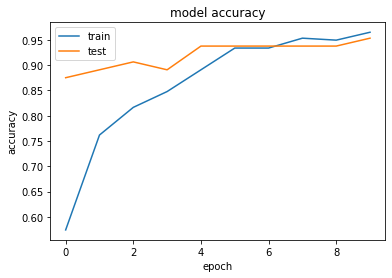

In [208]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [209]:
model=load_model("model_adv.h5")
y_actual = []
y_test = []

In [210]:
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Normal'):
  img1 = image.load_img('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Normal/'+i, target_size=(224,224))
  img1 = image.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  p = model.predict_classes(img1)
  y_test.append(p[0,0])
  y_actual.append(1)


In [211]:
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Covid'):
  img = image.load_img('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [212]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [213]:
y_actual, y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int32))

In [214]:
from sklearn.metrics import confusion_matrix

In [215]:
cm = confusion_matrix(y_actual, y_test)

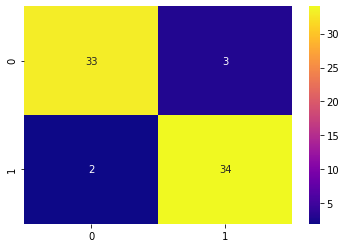

In [216]:
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)